[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]
8
-1
W is now under 0 again: -0.8
Optimized a step.
Optimum choice: [array([ 0.8, -0.8]), 0.0] with magnitude: 1.1313708499
With latest optimum: 2.4
W is now under 0 again: -1.5124013153e-13
Optimized a step.
Optimum choice: [array([ 0.32, -0.32]), 0.39999999999985647] with magnitude: 0.452548339959
With latest optimum: 0.48


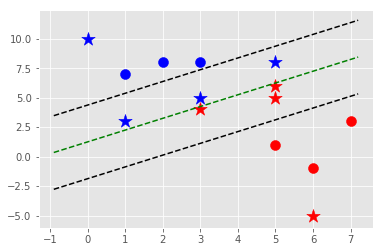

In [1]:
#This module contains the math of the support vector machine algorithm

#GOAL: Algorithm to optimize constants W and b for classification function with training data

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class support_vector_machine:
	
	#visualization optional // for eyeballing
	def __init__(self,visualization=True):
		self.visualization = visualization
		#for visualization purposes only
		self.colors = {1:'r',-1:'b'}
		if self.visualization:
			self.fig = plt.figure()
			self.ax = self.fig.add_subplot(1,1,1)
	
	#main algorithm for training the svm and setting parameters
	def fit(self,data):
		self.data = data
		#dictionary for optimums = {||W||: [w,b]} // sets of w,b from iteration through convex problem
		opt_dict = {}
		#this needs to be changed for multidimensional arrays
		transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
		
		#all features // from all featuresets // from all classes 
		all_data = []
		for classes in self.data:
			for featureset in self.data[classes]:
				for feature in featureset:
					all_data.append(feature)
		#from all_data array read out max value // begin min-optimization with max value
		print(all_data)
		self.max_feature_value=max(all_data)
		self.min_feature_value=min(all_data)
		print(self.max_feature_value)
		print(self.min_feature_value)
		all_data=None

		#goal is to meet the Yi(Xi.W+b) function so we get as close as possible to 1
		#define step_sizes for convex optimization // step_sizes = [0.8,0.08]
		step_sizes = [self.max_feature_value*0.1,
					self.max_feature_value*0.01]
					#point of expense // multithreading possible?
					#self.max_feature_value*0.001]
				#expensive // vielfaches von feature value für b-steps
		b_range_multiple = 5
		b_multiple = 5
		latest_optimum = self.max_feature_value*10 #80
		#actual iteration through feature values // starting with 0.1 step size // step = 8
		for step in step_sizes:
			#set w with maximum value for starting the optimization // w = [80,80]
			w = np.array([latest_optimum,latest_optimum])
			#optimized = True when convex reached the lowest point
			optimized = False
			while not optimized:
				#Numpy arange function sets steps for b // arange = [-80*5,80*5,8*5] = [-40,40,step=4]
				for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
									self.max_feature_value*b_range_multiple,step*b_multiple):
									for transformations in transforms:
										w_t = w*transformations #[80,80],[-80,80],[80,-80],[-80,-80]
										found_option = True
										#weakest in SVM // must be valid & calculated for all datapoints
										#Yi(Xi.W+b)>=1
										for i in self.data: #i = {1,-1}
											for xi in self.data[i]: #xi = [1,7],[2,8],...
												yi=i
												if not yi*(np.dot(w_t,xi)+b) >= 1:
													found_option = False

										if found_option:
											#opt_dic = {Magnitude(80,80):[[80,80],400]} // key=magnitude
											opt_dict[np.linalg.norm(w_t)] = [w_t,b]
											#print('these are options for b: '+str(b))
				#end of convex optimization
				if w[0] < 0: #80<0, 79.2<0, ..., 0.8<0, 0<0, -0.8<0
					print('W is now under 0 again: '+str(w[0]))
					optimized = True #end of w step iteration -> next step_size
					print('Optimized a step.')
				else:
					#w = [80,80]-8 = [72,72]
					w = w - step
			
			#norms = sorted ascending magnitudes of w_t // keys of data dictionary
			norms = sorted([n for n in opt_dict])
			#smallest magnitude of vector as opt_choice ||W||:{W,b}
			opt_choice = opt_dict[norms[0]] #{Magnitude(8,8):[[8,8],400- ...]}
			print('Optimum choice: '+str(opt_choice)+' with magnitude: '+str(norms[0]))

			self.w = opt_choice[0] # w = [8,8]
			self.b = opt_choice[1] # b = 400 - ...
			#setting w for next iteration
			latest_optimum = opt_choice[0][0]+step*2 #8+8*2 = 24
			print('With latest optimum: '+str(latest_optimum))

	def predict(self,features):
		#sign(Xi.W+b) // sign returns {1,0,-1}
		classification = np.sign(np.dot(np.array(features),self.w)+self.b)
		if classification != 0 and self.visualization:
			#scatter plot features for prediction // self.colors is a dictionary set earlier
			self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
		else:
			print('featureset',features,'is on decision boundary')
		return classification
	
	#not part of the core algorithm, purely for visualization purposes
	def visualize(self):
		#scatter plot known features
		[[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
		
		def hyperplane(x,w,b,v): #returns y coordinate of missing datapoint
			return (-w[0]*x-b+v)/w[1] #x.w[0] + y.w[1] + b =1 // y = -x.w[0] - b + 1 / w[1]
		
		#setting plot range
		datarange = (self.min_feature_value*0.9,self.max_feature_value*0.9)
		hyp_x_min=datarange[0]
		hyp_x_max=datarange[1]

		#positive support vector hyperplane
		psv1 = hyperplane(hyp_x_min,self.w,self.b,1) #returns y coordinate for x_min
		psv2 = hyperplane(hyp_x_max,self.w,self.b,1) #returns y coordinate for x_max
		self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k--')

		#negative support vector hyperplane
		nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1) #returns y coordinate for x_min
		nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1) #returns y coordinate for x_max
		self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k--')

		#decision boundary hyperplane
		db1 = hyperplane(hyp_x_min,self.w,self.b,0) #returns y coordinate for x_min
		db2 = hyperplane(hyp_x_max,self.w,self.b,0) #returns y coordinate for x_max
		self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'g--')

		plt.show()

#set data and call functions

data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}
svm = support_vector_machine()
svm.fit(data=data_dict)
predict_data = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]
for p in predict_data:
	svm.predict(p)
svm.visualize()
#mathematics for the derivation of constants and support vectors
#1) hyperplane and support vectors // Constraint 1)
	#Xi.W+b=0 is the hyperplane // if <0 then class (-) // if >0 then class (+)
	#Xi.W+b=-1 and Xi.W+b=1 are the support vectors
	#classes either -1 or 1 = Yi // multiplying SV function with Yi and setting to 0
	#Yi(Xi.W+b)-1=0 // Constraint 1)
#2) minimize the magnitude of W // Constraint 2)
	#minimize |W| maximize b while Yi(Xi.W+b)>=1 // training data can't be between hyperplane 0 and SV 1
	#Width = (Xminus -Xplus)*W/|W| // insert Yi(Xi.W+b)-1=0 for Xminus and Xplus 
	#2/|W| // maximize width between support vectors -> minimize |W|
	#minimize 1/2*|W|² // for ease of math
#3) combine 1) and 2) in lagrangian equation
	#L(W,b)= 1/2*|W|² - SUMi(Ai(Yi(Xi.W+b)-1)) // Whereas W is minimized and b is maximized
		#differentiate L with respect to W // W = SUMi(Ai*Yi*Xi)
		#differentiate L with respect to b // 0 = SUMi(Ai*Yi)
		#L = SUMi(Ai)-1/2*SUMij(Ai*Aj*Yi*Yj.(Xi.Xj))
#optimizing W and b to fullfil Classes(KnownFeatures.W+b) >= 1
#iteration for W with iteration for b with constraint Yi(Xi.W+b) >= 1